### 1. Генерация случайных величин с заранее заданной ковариационной матрицей.



Разложение Холецкого используется для генерации коррелированных между собой случайных величин. Проще говоря, когда есть какой-то набор независимых случайных величин и ковариационная матрица. Как из этого получить набор случайных величин, имеющих такую ковариационную матрицу ?

Это нужно как для моделирования случайных сигналов и физических процессов, так и в качестве вспомогательного элемента других вычислительных методов (Монте-Карло).
Решение этой задачи делается с помощью разложения Холецкого. Алгоритм заключается в следующем:
1. Осуществить разложение Холецкого ковариационной матрицы: $\boldsymbol{\Sigma}=\mathbf{A} \mathbf{A}^T$
2. Сгенерировать случайный вектор $\mathbf{z}$, компонентами которого являются независимые случайные величины с нормальным распределением

3. Решением поставленной задачи будет вектор:
$$
\mathbf{x}=\mathbf{m}+\mathbf{A} \mathbf{z}
$$
Здесь $\mathbf{m}$ - это постоянный вектор, составленный из математических ожиданий компонент вектора $\mathbf{z}$.

Напишите функцию, которая в качестве входного параметра берёт ковариационную матрицу, а возвращает набор случайных величин, действуя по описанному выше алгоритму.

In [3]:
import numpy as np

def generate_random_variables(cov_matrix, mean_vector):
    
    n = cov_matrix.shape[0]
    
    
    
    

    A = np.linalg.cholesky(cov_matrix)
    
    z = np.random.randn(n)
    x = mean_vector + A @ z
    return x

In [6]:
# Пример
cov_matrix = np.array([[4, 2], [2, 3]])

mean_vector = np.array([1, -1])

x = generate_random_variables(cov_matrix, mean_vector)

print( x)

[-1.13995528 -2.45655279]


### 2. Обработка экспериментальных данных..

1. Обработайте какую-нибудь лабораторную работу (например, из курса общей физики или просто из папки на диске), требующую проведения прямой по экспериментально полученным точкам. Для решения задачи регрессии рекомендуется использовать библиотеку scikit-learn (sklearn) или scipy.

2. Создайте прямую с шумом и аналогично обработайте данные.

В обоих пунктах нужно построить график, на который будут нанесены точки и прямая среднеквадратической регрессии.

Данные можно сформировать следующим образом:

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from seaborn import load_dataset
from scipy.optimize import curve_fit

# данные из лабораторной работы
data = pd.read_excel("data.xlsx")

T = data["T"][:-1]
U = data["U"][:-1]
I = data["I"][:-1]

# создание прямой с шумом

true_w1 = 2.8
true_w0 = 1.5
xs = np.arange(0, 10, 0.5)
noise = np.random.normal(0, 0.45, size=xs.shape)
ys = true_w1 * xs + true_w0 + noise

FileNotFoundError: [Errno 2] No such file or directory: 'data.xlsx'

Уравнение прямой: U = 1.01 * T + 1.01


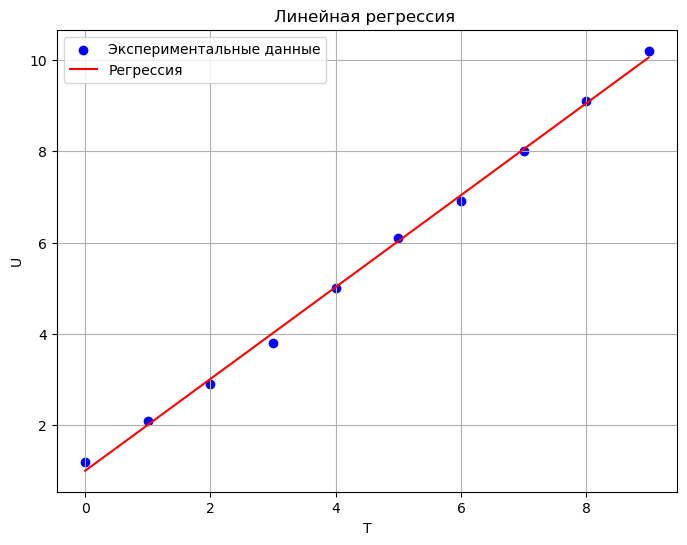

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



T = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
U = np.array([1.2, 2.1, 2.9, 3.8, 5.0, 6.1, 6.9, 8.0, 9.1, 10.2])

T_reshaped = T.reshape(-1, 1)

model = LinearRegression()
model.fit(T_reshaped, U)

slope = model.coef_[0]
intercept = model.intercept_
print(f"Уравнение прямой: U = {slope:.2f} * T + {intercept:.2f}")

U_pred = model.predict(T_reshaped)

plt.figure(figsize=(8, 6))
plt.scatter(T, U, color='blue', label='Экспериментальные данные')
plt.plot(T, U_pred, color='red', label='Регрессия')
plt.xlabel('T')
plt.ylabel('U')
plt.title('Линейная регрессия ')
plt.legend()
plt.grid(True)
plt.show()

Уравнение прямой: y = 2.86 * x + 1.25


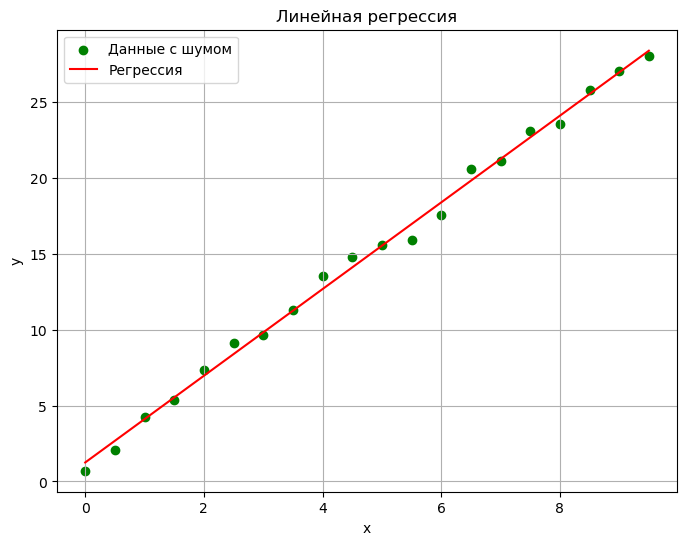

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

true_w1 = 2.8  # коэффициент наклона
true_w0 = 1.5  # свободное слагаемое
xs = np.arange(0, 10, 0.5)
noise = np.random.normal(0, 0.45, size=xs.shape)
ys = true_w1 * xs + true_w0 + noise

xs_reshaped = xs.reshape(-1, 1)

model = LinearRegression()
model.fit(xs_reshaped, ys)

slope = model.coef_[0]
intercept = model.intercept_
print(f"Уравнение прямой: y = {slope:.2f} * x + {intercept:.2f}")

ys_pred = model.predict(xs_reshaped)

plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, color='green', label='Данные с шумом')
plt.plot(xs, ys_pred, color='red', label='Регрессия')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейная регрессия')
plt.legend()
plt.grid(True)
plt.show()

### 3. Правдоподобие для гауссовой вероятностной модели.

Пусть дана выборка точек на прямой $\left\{x_i\right\}$.

Максимизируйте правдоподобие (или его логарифм) в гауссовой вероятностной модели:
$$
\prod_i p\left(x_i\right) \rightarrow \max _{\mu, \sigma} \quad p(x)=\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}} .
$$




$L(\mu, \sigma) = \prod_{i=1}^{n} p(x_i) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi \sigma^2}} e^{ -\frac{(x_i - \mu)^2}{2\sigma^2} }.$





$\ell(\mu, \sigma) = \ln L(\mu, \sigma) = \sum_{i=1}^{n} \ln p(x_i) = \sum_{i=1}^{n} \left( -\frac{1}{2} \ln(2\pi \sigma^2) - \frac{(x_i - \mu)^2}{2\sigma^2} \right).$





$\ell(\mu, \sigma) = -\frac{n}{2} \ln(2\pi \sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2.$



Мю:

$\frac{\partial \ell}{\partial \mu} = -\frac{1}{2\sigma^2} \cdot 2 \sum_{i=1}^{n} (x_i - \mu) (-1) = \frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu).$



$\frac{\partial \ell}{\partial \mu} = 0 \quad \Rightarrow \quad \sum_{i=1}^{n} (x_i - \mu) = 0 \quad \Rightarrow \quad n \mu = \sum_{i=1}^{n} x_i.$


Сигма:

$\frac{\partial \ell}{\partial \sigma} = -\frac{n}{2} \cdot \frac{2\sigma}{2\pi \sigma^4} + \frac{1}{2\sigma^4} \cdot 2 \sum_{i=1}^{n} (x_i - \mu)^2 = -\frac{n}{\sigma} + \frac{1}{\sigma^3} \sum_{i=1}^{n} (x_i - \mu)^2.$




$-\frac{n}{\sigma} + \frac{1}{\sigma^3} \sum_{i=1}^{n} (x_i - \mu)^2 = 0.$


Таким образом оптимальные значения параметров совпадают со средним и стандартным отклонением. 

### 4. Гауссовы интегралы для МНК.  


На лекции обсуждался учет влияния систематической погрешности путем усреднения решения задачи МНК по гауссовому нормальному распределению для $y$-координат точек выборки: $\tilde{y}_i \sim \mathcal{N}\left(y_i, s^2\right)$, где погрешность по оси ординат считалась равной $s$. Обобщите этот вывод на случай, когда каждая точка имеет свою $y$-погрешность $s_i$. Для этого проведите усреднение по многомерному нормальному распределению для $\tilde{y}_i$ с произвольной симметричной матрицей ковариации $A^{-1}$ :
$$
\begin{array}{r}
\tilde{y} \sim \frac{1}{(2 \pi)^{N / 2} (\operatorname{det} (A))^{1/2} } \exp \left(-\frac{(\tilde{y}-y)^T A^{-1}(\tilde{y}-y)}{2}\right), \ \ \ \ (1) \\
\text { где } y=\left(\begin{array}{lll}
y_i & \ldots & y_N
\end{array}\right)^T, \text { a } \tilde{y}=\left(\begin{array}{lll}
\tilde{y}_i & \ldots & \tilde{y}_N
\end{array}\right)^T .
\end{array}
$$
1. Покажите, что распределение (1) правильно нормировано. Указание: Выполните замену координат $\tilde{y}-y=S z$, где матрица $S$ диагонализует $A$.
2. Вычислите неприводимые парные корреляторы $\left\langle\left\langle\tilde{w}_i \tilde{w}_j\right\rangle\right\rangle$, усредняя по распределению (1). Указание: Сделайте замену $\tilde{y}-y=Y$. Для вычисления гауссового интеграла с предэкспонентой вычислите интеграл $\int d^N Y \exp \left(-Y^T A^{-1} Y / 2+J^T Y\right)$ и выполните дифференцирование по параметрам $J_i$ (компоненты вектора $J$ ).

1. 



$\int_{-\infty}^{\infty} \cdots \int_{-\infty}^{\infty} p(\tilde{y}) \, d\tilde{y}_1 \cdots d\tilde{y}_N = 1$??


$\tilde{y} - y = S z$


$  A = S S^T $

$  A^{-1} = (S S^T)^{-1} = (S^T)^{-1} S^{-1} $



$d\tilde{y}_1 \cdots d\tilde{y}_N = |\det S| \, dz_1 \cdots dz_N$



$(\tilde{y} - y)^T A^{-1} (\tilde{y} - y) = (S z)^T A^{-1} (S z) = z^T S^T A^{-1} S z = z^T S^T (S S^T)^{-1} S z = z^T z$

Так как  $S^T (S S^T)^{-1} S = I $




$p(\tilde{y}) = \frac{1}{(2\pi)^{N/2} (\det A)^{1/2}} \exp\left( -\frac{1}{2} z^T z \right)$



$\int p(\tilde{y}) \, d\tilde{y}_1 \cdots d\tilde{y}_N = \int \frac{1}{(2\pi)^{N/2} (\det A)^{1/2}} \exp\left( -\frac{1}{2} z^T z \right) |\det S| \, dz_1 \cdots dz_N$



$\int \frac{1}{(2\pi)^{N/2}} \exp\left( -\frac{1}{2} z^T z \right) dz_1 \cdots dz_N = 1$

ЧТД


2. 




$\langle\langle \tilde{y}_i \tilde{y}_j \rangle\rangle = \langle \tilde{y}_i \tilde{y}_j \rangle - \langle \tilde{y}_i \rangle \langle \tilde{y}_j \rangle$




$Y = \tilde{y} - y$



$p(Y) = \frac{1}{(2\pi)^{N/2} (\det A)^{1/2}} \exp\left( -\frac{1}{2} Y^T A^{-1} Y \right)$



$\langle \tilde{y}_i \tilde{y}_j \rangle = \langle (y_i + Y_i)(y_j + Y_j) \rangle = y_i y_j + y_i \langle Y_j \rangle + y_j \langle Y_i \rangle + \langle Y_i Y_j \rangle$



$\langle \tilde{y}_i \tilde{y}_j \rangle = y_i y_j + \langle Y_i Y_j \rangle.$



$\langle\langle \tilde{y}_i \tilde{y}_j \rangle\rangle = \langle \tilde{y}_i \tilde{y}_j \rangle - \langle \tilde{y}_i \rangle \langle \tilde{y}_j \rangle = \left( y_i y_j + \langle Y_i Y_j \rangle \right) - y_i y_j = \langle Y_i Y_j \rangle$



Так как  Y  распределена по многомерному нормальному закону с ковариационной матрицей  A , то:

$\langle Y_i Y_j \rangle = A_{ij}$

	
Таким образом,

$\langle\langle \tilde{y}_i \tilde{y}j \rangle\rangle = A{ij}$


### 5. Систематические погрешности в МНК.

Выполните в условиях предыдущей задачи.

1. Оцените систематические погрешности параметров модели $w_\alpha$, следуя вычислению, приведенному на лекции, и используя корреляторы, полученные в предыдущем пункте.
2. Запишите решение в частном случае диагональной матрицы $A=\operatorname{diag}\left(A_1, \ldots, A_N\right)$. Как следует выбирать величины $A_i$ для моделирования $y$-погрешности $i$-ой точки, равной $s_i$ ?